In [1]:
import platform
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False 

In [30]:
#시간대 별로 사람들이 가장 많이 타고 내리는 역은 어디 일까.. 
f = open('traffic2.csv','r',encoding='utf-8')
data = csv.reader(f, delimiter= ',')
next(data)
next(data)
time= int(input('몇 시의 승차 인원이 가장 많은 역을 알고 싶은가요?'))
result = [0] 
station = [''] 
m=0

for row in data:
    if time<4:
        time +=24
    row[4:] = map(int,row[4:])
    for j in range(4,58,2):
        if 2*(time-2)==j:
            if row[j]>m:
                m = row[j]
                station = row[3]


print("{}시에 가장 많은 인원이 타는 역은 {}역으로, {}명입니다.".format(time,station,m))

f.close()

17시에 가장 많은 인원이 타는 역은 강남역으로, 198762명입니다.


[153, 143, 166, 157, 178, 206, 204, 207, 166, 172, 191, 210, 179, 195, 181, 179, 172, 157, 154, 176, 187, 201, 164, 178, 224, 214, 192, 219, 209, 218, 213, 212, 269, 285, 297, 283, 288, 322, 371, 334, 362, 336, 347, 306, 302, 277, 317, 315, 320, 295, 289, 297, 271, 225, 244, 241, 260, 232, 223, 223, 235, 249, 236, 214, 188, 189, 203, 164, 162, 156, 101, 147, 135, 135, 130, 77, 76, 63, 60, 89, 58, 50, 46, 39, 21, 26, 17, 13, 13, 7, 6, 0, 3, 1, 2, 2, 2, 0, 2, 0, 2, 120, 127, 167, 140, 145, 179, 203, 194, 208, 233, 199, 184, 191, 194, 165, 142, 160, 155, 159, 176, 191, 195, 179, 204, 210, 234, 218, 227, 238, 245, 269, 239, 326, 298, 316, 305, 330, 336, 344, 355, 411, 346, 350, 342, 323, 306, 317, 332, 317, 313, 313, 304, 292, 259, 228, 243, 257, 220, 220, 242, 253, 238, 236, 225, 221, 199, 237, 191, 187, 177, 129, 140, 108, 120, 114, 75, 77, 62, 83, 70, 69, 51, 54, 51, 52, 53, 33, 35, 23, 23, 16, 12, 15, 13, 6, 7, 7, 4, 3, 0, 2]


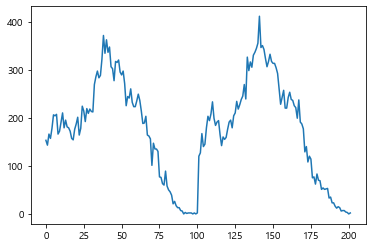

In [16]:
f = open('people.csv','r',encoding='utf-8')
data = csv.reader(f, delimiter= ',')
next(data)

name = input('인구구조가 알고 싶은 지역의 이름은?')
home =[]

for row in data:
    if name in row[0]:
        for i in row[3:]:
            home.append(int(i))

print(home)

plt.plot(home)

plt.show()

<ipython-input-47-4a462712fd43>:18: RuntimeWarning: invalid value encountered in true_divide
  away= np.array(row[3:],dtype=int)/int(row[2])


경기도 하남시 (4145000000)


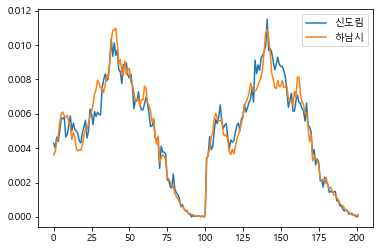

In [47]:
# 인구구조 비교
f = open('people.csv','r',encoding='utf-8')
data = csv.reader(f, delimiter= ',')
next(data)

data = list(data)
name = input('인구구조가 알고 싶은 지역의 이름은?')
mn = 1          #최소값을 저장할 변수
resultname = '' #최소값에 해당하는 지역의 이름을 저장할 변수
home =[]
result =[]       #최소값을 갖는 지역의 연령대별 인구 비율
for row in data:
    if name in row[0]:
        home = np.array(row[3:],dtype=int)/int(row[2])

for row in data:
    if name not in row[0]:
        away= np.array(row[3:],dtype=int)/int(row[2])
        s= np.sum((home-away)**2)
        if s<mn:
            mn=s
            resultname=row[0]
            result =away

print(resultname)
plt.plot(home,label=name)
plt.plot(result,label=resultname.split()[1])
plt.legend()
plt.show()

f.close()

<ipython-input-75-ad830fb60f25>:19: RuntimeWarning: invalid value encountered in true_divide
  away= np.array(row[3:],dtype=int)/int(row[2])


['경기도 하남시 (4145000000)', '경기도 김포시 (4157000000)', '경기도 고양시 덕양구 흥도동(4128153000)', '경기도 광주시 오포읍(4161025000)', '경기도 광명시 소하2동(4121065000)']
[7.778472388759002e-05, 9.343160620199501e-05, 0.00011490688100778649, 0.00012001414270185933, 0.00013836266921448754]


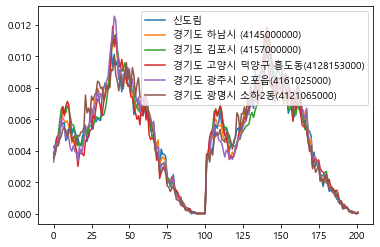

In [75]:
# 인구구조 비교 5개
f = open('people.csv','r',encoding='utf-8')
data = csv.reader(f, delimiter= ',')
next(data)

data = list(data)
name = input('인구구조가 알고 싶은 지역의 이름은?')
mn = [1,1,1,1,1]          #최소값을 저장할 변수
resultname = ['']*5 #최소값에 해당하는 지역의 이름을 저장할 변수
home =[]
result =[0]*5       #최소값을 갖는 지역의 연령대별 인구 비율

for row in data:
    if name in row[0]:
        home = np.array(row[3:],dtype=int)/int(row[2])

for row in data:
    if name not in row[0]:
        away= np.array(row[3:],dtype=int)/int(row[2])
        s= np.sum((home-away)**2)
        for j in range(5):
            if s<mn[j] and row[0] not in resultname:
                mn[j]=s
                resultname[j]=row[0]
                result[j] =away

print(resultname)
print(mn)
plt.plot(home,label=name)
for i in range(5):
    plt.plot(result[i],label=resultname[i])

plt.legend()
plt.show()

f.close()

In [76]:
print(np.sqrt(2))

1.4142135623730951


In [77]:
print(np.pi)
print(np.sin(0))
print(np.cos(np.pi))

3.141592653589793
0.0
-1.0


In [79]:
a = np.random.rand(5)#0~1 사이에 있는 n개의 실수
print(a) 
print(type(a))

# ndarray - N -dimensional N-차원 array 배열


[0.75392052 0.95178721 0.99588851 0.33612049 0.6773413 ]
<class 'numpy.ndarray'>


In [170]:
print(np.random.choice(46,5,replace=False))# 0에서 6미만까지 숫자를 10개 생성




[15 42 44  7 16]


In [169]:
print(np.random.choice(6,10,p=[0.1,0.2,0.3,0.2,0.1,0.1]))



[1 3 4 1 1 1 4 0 5 3]


In [ ]:
a= np.array([1,2,3,4])  # numpy array는 쉼표가 없다. 리스트처럼 인덱싱과 슬라이싱이 가능하다.
                        # array는 계산이 되며 한가지 타입만 저장할 수 있다.

# a= np.array([1,2,3,'4']) 안 됨
